<a href="https://colab.research.google.com/github/mdraavash/Data-Analytics/blob/main/LaptopPriceAnalytic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessarcy Libraries

In [ ]:
# importing necessarcy libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Data Exploration

## Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
file_path='/content/gdrive/MyDrive/Colab Notebooks/business analytics /01-laptop_price.csv'
df=pd.read_csv(file_path, encoding='latin1')
display(df.head())

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Data Type Check

In [ ]:
display(df.dtypes)

,0
laptop_ID,int64
Company,object
Product,object
TypeName,object
Inches,float64
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object


## Dataset Statics

In [ ]:
display(df.describe())

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


## Null value Check

In [ ]:
display(df.isnull().sum())

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


## Converting RAM into numeric type

In [ ]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

In [ ]:
display(df['Ram'].describe())

,Ram
count,1303.000000
mean,8.382195
std,5.084665
min,2.000000
25%,4.000000
50%,8.000000
75%,8.000000
max,64.000000


## Distribution Visualization

### Numeric Columns

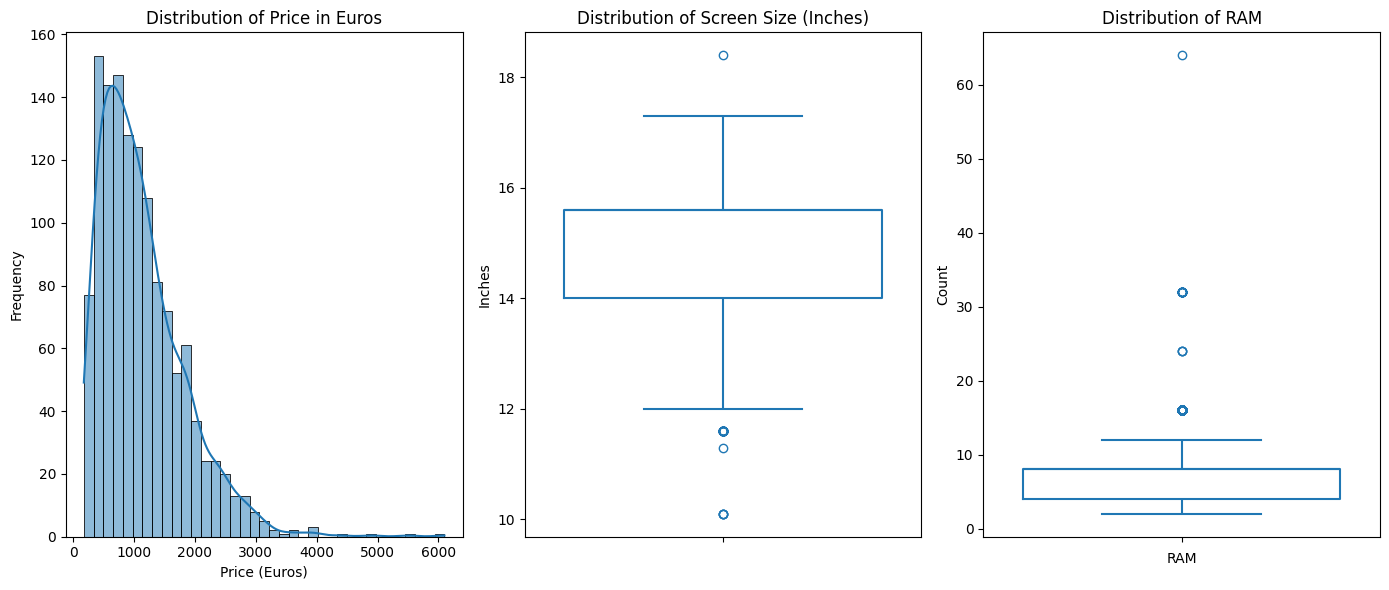

In [ ]:
plt.figure(figsize=(14,6))

# Distribution of Price_euros
plt.subplot(1, 3, 1)
sns.histplot(df['Price_euros'], kde=True)
plt.title('Distribution of Price in Euros')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')

# Distribution of Inches
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Inches'], fill = False)
plt.title('Distribution of Screen Size (Inches)')
plt.xlabel('')
plt.ylabel('Inches')

# Distribution of RAM
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Ram'], fill = False)
plt.title('Distribution of RAM')
plt.xlabel('RAM')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Non Numeric Column

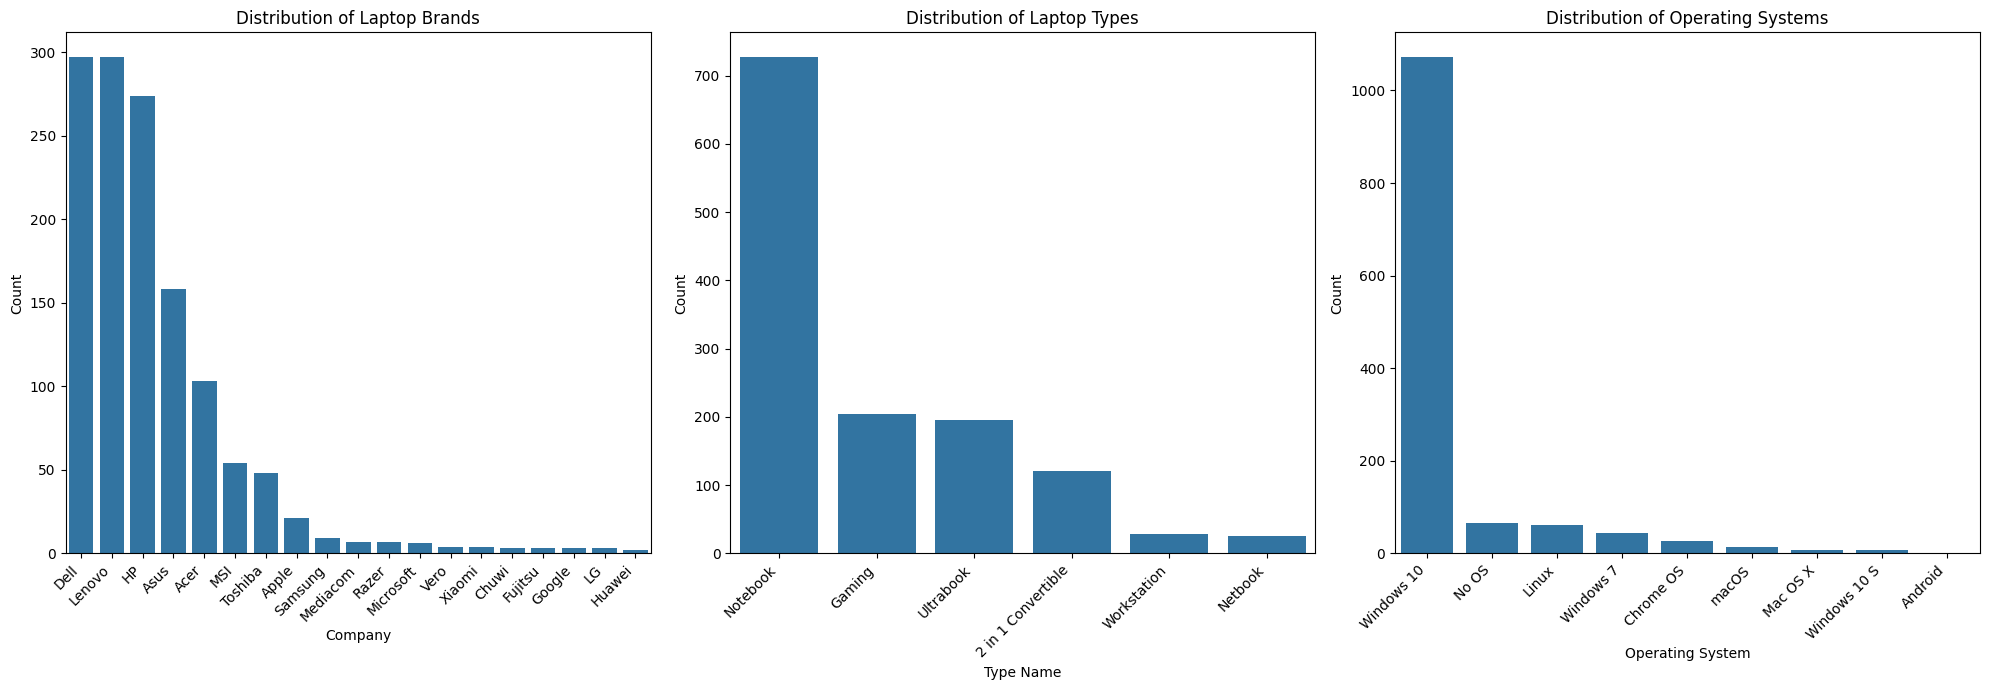

In [ ]:
plt.figure(figsize=(20, 7))

# Distribution of Company
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Company', order=df['Company'].value_counts().index)
plt.title('Distribution of Laptop Brands')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Distribution of TypeName
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='TypeName', order=df['TypeName'].value_counts().index)
plt.title('Distribution of Laptop Types')
plt.xlabel('Type Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Distribution of OpSys
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='OpSys', order=df['OpSys'].value_counts().index)
plt.title('Distribution of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Caping Outliers

### Creating capping function

In [ ]:
def cap_outliers_iqr(series, iqr_multiplier=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

### Applying capping function

In [ ]:
df['Price_euros'] = cap_outliers_iqr(df['Price_euros'])
df['Ram'] = cap_outliers_iqr(df['Ram'])
df['Inches'] = cap_outliers_iqr(df['Inches'])

## Statstical Change

In [ ]:
display(df[['Price_euros', 'Ram', 'Inches']].describe())

,Price_euros,Ram,Inches
count,1303.000000,1303.000000,1303.000000
mean,1109.081711,7.778972,15.021719
std,644.015967,3.422204,1.411494
min,174.000000,2.000000,11.600000
25%,599.000000,4.000000,14.000000
50%,977.000000,8.000000,15.600000
75%,1487.880000,8.000000,15.600000
max,2821.200000,14.000000,18.000000


## Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df['Ram'] = scaler.fit_transform(df['Ram'].values.reshape(-1, 1))
df['Inches'] = scaler.fit_transform(df['Inches'].values.reshape(-1, 1))

## Stastical Change

In [ ]:
display(df[['Ram', 'Inches']].describe())

,Ram,Inches
count,1.303000e+03,1.303000e+03
mean,9.270320e-17,2.143080e-15
std,1.000384e+00,1.000384e+00
min,-1.689318e+00,-2.425113e+00
25%,-1.104675e+00,-7.241343e-01
50%,6.461137e-02,4.098514e-01
75%,6.461137e-02,4.098514e-01
max,1.818541e+00,2.110830e+00


### Changed Visualization

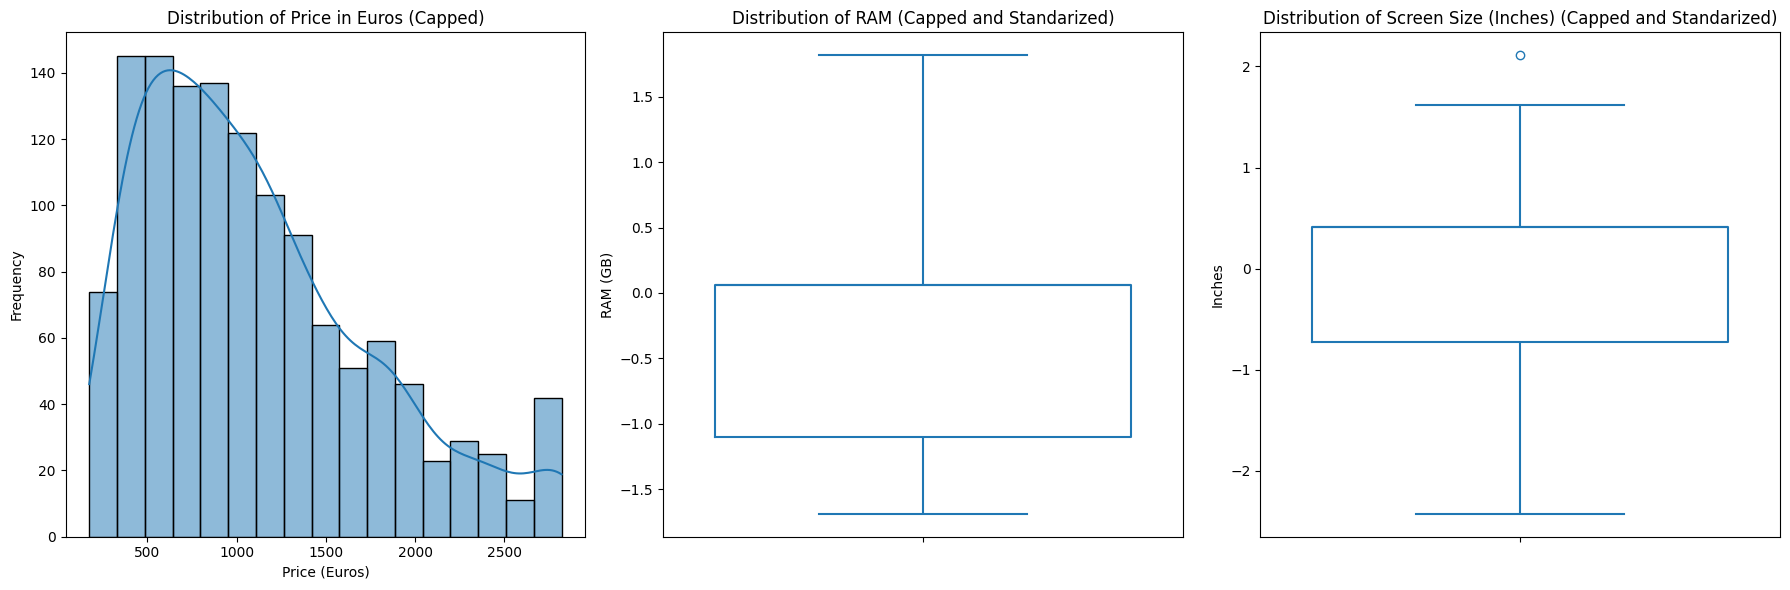

In [ ]:
plt.figure(figsize=(18, 6))

# Distribution of Capped Price_euros
plt.subplot(1, 3, 1)
sns.histplot(df['Price_euros'], kde=True)
plt.title('Distribution of Price in Euros (Capped)')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')

# Distribution of Standarized Ram
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Ram'], fill = False)
plt.title('Distribution of RAM (Capped and Standarized)')
plt.xlabel('')
plt.ylabel('RAM (GB)')

# Distribution of Standarized Inches
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Inches'], fill = False)
plt.title('Distribution of Screen Size (Inches) (Capped and Standarized)')
plt.xlabel('')
plt.ylabel('Inches')

plt.tight_layout()
plt.show()

## Using one hot encoding for categorical column

In [ ]:
df_company_encoded = pd.get_dummies(df['Company'], prefix='Company')
df_typename_encoded = pd.get_dummies(df['TypeName'], prefix='TypeName')

In [ ]:
display(df_company_encoded.head())
display(df_typename_encoded.head())

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,True,False,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False


# Identifying Dependent and Independent Variables

## **Dependent Variable**

**Price_euros**

## **Indpendent Variable**

**1. Company**

**2. TypeName**

**3. Ram**


## Creating new dataframe containing dependent and independent variables only

In [ ]:
df_processed = pd.concat([df['Price_euros'], df['Ram'], df_company_encoded, df_typename_encoded], axis=1)
display(df_processed.head())

,Price_euros,Ram,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,...,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,1339.69,0.064611,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,898.94,0.064611,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,575.00,0.064611,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,2537.45,1.818541,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1803.60,0.064611,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


# Regression Models

## Independent Variable 1 : Company

In [ ]:
# Defining independent and dependent variables
y = df_processed['Price_euros']
X = df_processed.filter(regex='Company_', axis = 1)

#Convert Boolean to integers
X = X.astype(int)
#Add constant to the independent variables
X = sm.add_constant(X)
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Creating and Fitting regression model
model_company = sm.OLS(y_train, X_train).fit()

### Model Prediction

In [ ]:
y_pred_company = model_company.predict(X_test)

### Plotting the Model

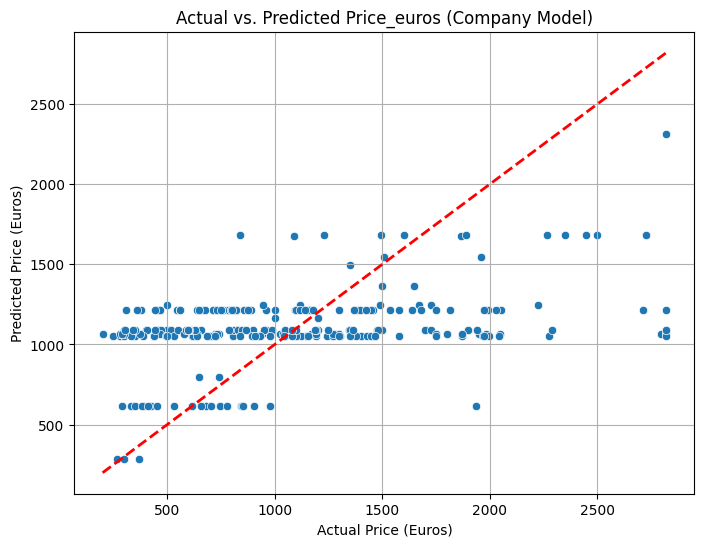

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_company)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) # Diagonal line for perfect prediction
plt.title('Actual vs. Predicted Price_euros (Company Model)')
plt.xlabel('Actual Price (Euros)')
plt.ylabel('Predicted Price (Euros)')
plt.grid(True)
plt.show()

### Plotting Residuals

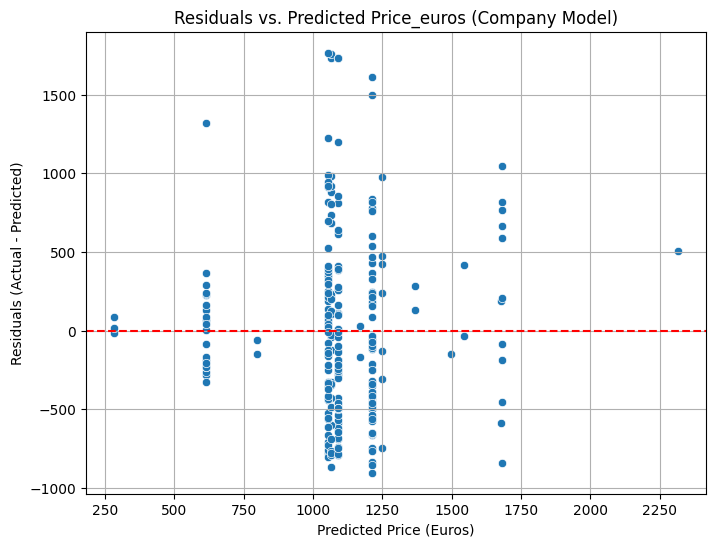

In [ ]:
residuals_company = y_test - y_pred_company

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_company, y=residuals_company)
plt.axhline(y=0, color='r', linestyle='--') # Horizontal line at 0 for reference
plt.title('Residuals vs. Predicted Price_euros (Company Model)')
plt.xlabel('Predicted Price (Euros)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

### Model Summary

In [ ]:
display(model_company.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_euros   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     9.700
Date:                Mon, 24 Nov 2025   Prob (F-statistic):           2.76e-25
Time:                        17:52:35   Log-Likelihood:                -8149.3
No. Observations:                1042   AIC:                         1.634e+04
Df Residuals:                    1023   BIC:                         1.643e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1146.5703     65.913     17.395      0.000    1017.231    1275.910
Company_Acer       -531.1080     91.702     -5.792      0.000    -711.054    -351.162
Company_Apple       397.7702    147.944      2.689      0.007     107.462     688.079
Company_Asus        -80.3147     83.117     -0.966      0.334    -243.414      82.785
Company_Chuwi      -832.2736    339.779     -2.449      0.014   -1499.018    -165.530
Company_Dell         66.0441     76.158      0.867      0.386     -83.399     215.487
Company_Fujitsu    -347.5703    581.086     -0.598      0.550   -1487.827     792.686
Company_Google      531.0964    339.779      1.563      0.118    -135.648    1197.840
Company_HP          -91.4220     76.778     -1.191      0.234    -242.081      59.237
Company_Huawei      352.4297    581.086      0.607      0.544    -787.827    1492.686
Company_LG          952.4297    339.779      2.803      0.005     285.686    1619.174
Company_Lenovo      -58.2774     75.568     -0.771      0.441    -206.564      90.009
Company_MSI         535.6201    109.178      4.906      0.000     321.382     749.859
Company_Mediacom   -863.5703    296.097     -2.917      0.004   -1444.598    -282.543
Company_Microsoft   532.6797    296.097      1.799      0.072     -48.348    1113.707
Company_Razer      1168.5297    244.739      4.775      0.000     688.282    1648.778
Company_Samsung     221.0011    227.950      0.970      0.333    -226.301     668.304
Company_Toshiba     101.7468    111.688      0.911      0.363    -117.416     320.910
Company_Vero       -929.1453    296.097     -3.138      0.002   -1510.173    -348.118
Company_Xiaomi       20.9047    413.525      0.051      0.960    -790.549     832.358
==============================================================================
Omnibus:                      116.294   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.227
Skew:                           0.921   Prob(JB):                     3.24e-34
Kurtosis:                       3.398   Cond. No.                     6.25e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.14e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Model Coefficeint

In [ ]:
coefficients_company = model_company.params
display(coefficients_company)

,0
const,1146.570315
Company_Acer,-531.107998
Company_Apple,397.770211
Company_Asus,-80.314700
Company_Chuwi,-832.273649
Company_Dell,66.044095
Company_Fujitsu,-347.570315
Company_Google,531.096351
Company_HP,-91.422036
Company_Huawei,352.429685


### Constructing the Regression Equation



In [ ]:
equation = f"Price_euros = {coefficients_company['const']:.2f}"
for col in coefficients_company.index[1:]:
    coef = coefficients_company[col]
    equation += f" + ({coef:.2f} * {col})"
display(equation)


'Price_euros = 1146.57 + (-531.11 * Company_Acer) + (397.77 * Company_Apple) + (-80.31 * Company_Asus) + (-832.27 * Company_Chuwi) + (66.04 * Company_Dell) + (-347.57 * Company_Fujitsu) + (531.10 * Company_Google) + (-91.42 * Company_HP) + (352.43 * Company_Huawei) + (952.43 * Company_LG) + (-58.28 * Company_Lenovo) + (535.62 * Company_MSI) + (-863.57 * Company_Mediacom) + (532.68 * Company_Microsoft) + (1168.53 * Company_Razer) + (221.00 * Company_Samsung) + (101.75 * Company_Toshiba) + (-929.15 * Company_Vero) + (20.90 * Company_Xiaomi)'

### Evaluating model by prediction

In [ ]:
model_columns = X_train.columns
companies_to_predict = ['Apple', 'HP', 'Dell']

for company_name in companies_to_predict:
  # Create a dictionary for a single observation
  new_observation = {col: 0 for col in model_columns} # Initialize all to 0
  new_observation['const'] = 1 # Set the constant

  # Set the specific company dummy variable to 1
  company_col_name = f'Company_{company_name}'
  if company_col_name in new_observation:
      new_observation[company_col_name] = 1
  else:
      print(f"Warning: Company '{company_name}' not found in model columns. Prediction might be inaccurate for this company.")

  # Convert the dictionary to a DataFrame
  new_X = pd.DataFrame([new_observation])

  predicted_price = model_company.predict(new_X)
  print(f"Predicted price for {company_name}: {predicted_price[0]:.2f}")

Predicted price for Apple: 1544.34
Predicted price for HP: 1055.15
Predicted price for Dell: 1212.61


## Independent Variable 2 : TypeName

In [ ]:
# Defining Independent and Dependent variables
y = df_processed['Price_euros']
X = df_processed.filter(regex='TypeName_', axis = 1)

#Convert Boolean to integers
X = X.astype(int)
#Add constant to the independent variables
X = sm.add_constant(X)
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Creating and Fitting regression model
model_typename = sm.OLS(y_train, X_train).fit()

### Model Prediction

In [ ]:
y_pred_typename = model_typename.predict(X_test)

### Plotting the Model

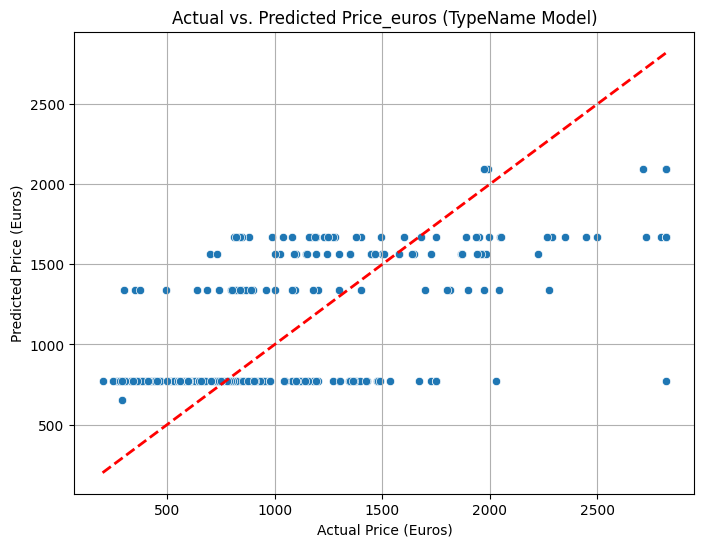

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_typename)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) # Diagonal line for perfect
plt.title('Actual vs. Predicted Price_euros (TypeName Model)')
plt.xlabel('Actual Price (Euros)')
plt.ylabel('Predicted Price (Euros)')
plt.grid(True)
plt.show()

### Plotting Residuals

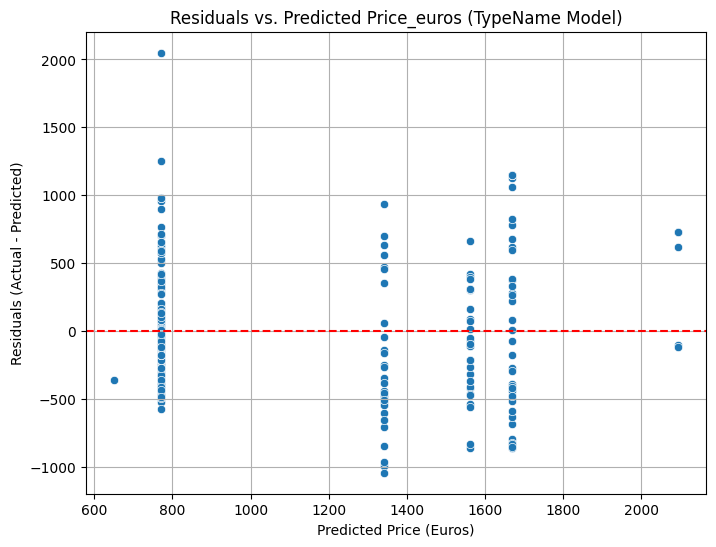

In [ ]:
residuals_typename = y_test - y_pred_typename

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_typename, y=residuals_typename)
plt.axhline(y=0, color='r', linestyle='--') # Horizontal line at 0 for reference
plt.title('Residuals vs. Predicted Price_euros (TypeName Model)')
plt.xlabel('Predicted Price (Euros)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

### Model Summary

In [ ]:
display(model_typename.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_euros   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     147.3
Date:                Mon, 24 Nov 2025   Prob (F-statistic):          3.76e-118
Time:                        17:52:36   Log-Likelihood:                -7951.6
No. Observations:                1042   AIC:                         1.592e+04
Df Residuals:                    1036   BIC:                         1.594e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        1155.8250     23.509     49.164      0.000    1109.694    1201.956
TypeName_2 in 1 Convertible   186.1793     50.169      3.711      0.000      87.736     284.623
TypeName_Gaming               514.6031     40.366     12.748      0.000     435.394     593.812
TypeName_Netbook             -505.0792     89.444     -5.647      0.000    -680.592    -329.566
TypeName_Notebook            -384.1665     29.395    -13.069      0.000    -441.848    -326.485
TypeName_Ultrabook            405.9904     40.611      9.997      0.000     326.301     485.680
TypeName_Workstation          938.2979     89.444     10.490      0.000     762.785    1113.811
==============================================================================
Omnibus:                      126.643   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.442
Skew:                           0.904   Prob(JB):                     2.94e-39
Kurtosis:                       3.904   Cond. No.                     1.21e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.99e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Model Coefficient

In [ ]:
model_typename_coefficients = model_typename.params
display(model_typename_coefficients)

,0
const,1155.824996
TypeName_2 in 1 Convertible,186.179289
TypeName_Gaming,514.603076
TypeName_Netbook,-505.079163
TypeName_Notebook,-384.166529
TypeName_Ultrabook,405.990403
TypeName_Workstation,938.297920


### Model Equation

In [ ]:
equation = f"Price_euros = {model_typename_coefficients['const']:.2f}"
for col in model_typename_coefficients.index[1:]:
    coef = model_typename_coefficients[col]
    equation += f" + ({coef:.2f} * {col})"
display(equation)

'Price_euros = 1155.82 + (186.18 * TypeName_2 in 1 Convertible) + (514.60 * TypeName_Gaming) + (-505.08 * TypeName_Netbook) + (-384.17 * TypeName_Notebook) + (405.99 * TypeName_Ultrabook) + (938.30 * TypeName_Workstation)'

### Model Evaluation

In [ ]:
model_columns = X_train.columns
typenames_to_predict = ['Netbook', 'Gaming', 'Ultrabook']

for typename_name in typenames_to_predict:
  # Create a dictionary
  new_observation = {col: 0 for col in model_columns} # Initialize all to 0
  new_observation['const'] = 1 # Set the constant

  # Set the specific typename dummy variables to 1
  typename_col_name = f'TypeName_{typename_name}'
  if typename_col_name in new_observation:
      new_observation[typename_col_name] = 1
  else:
      print(f"Warning: TypeName {typename_name} not found in model columns. Prediction might be inaccurate for this typename.")
  #Convert to Dataframe
  new_X = pd.DataFrame([new_observation])

  predicted_price = model_typename.predict(new_X)
  print(f"Predicted price for {typename_name}: {predicted_price[0]:.2f}")

Predicted price for Netbook: 650.75
Predicted price for Gaming: 1670.43
Predicted price for Ultrabook: 1561.82


# Independent Variable 3 : Ram

In [ ]:
# Initializing Dependent and Independent variables
y = df_processed['Price_euros']
X = df_processed['Ram']

#Add constant to the independent
X = sm.add_constant(X)

#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Creating and Fitting regressoin model
model_ram = sm.OLS(y_train, X_train).fit()


### Model Prediction

In [ ]:
y_pred_ram = model_ram.predict(X_test)

### Plotting the Model

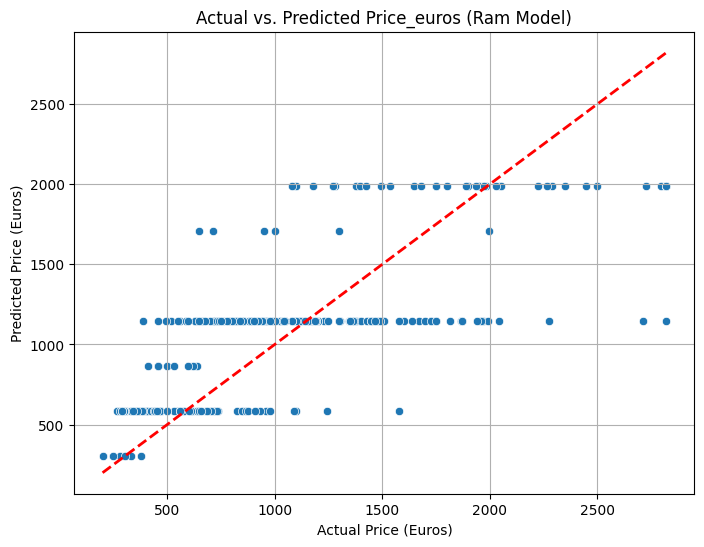

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_ram)
plt.plot([y_test.min(), y_test.max()], [y_test.min(),y_test.max()], '--r', linewidth=2) # Diagonal line for perfect prediction
plt.title('Actual vs. Predicted Price_euros (Ram Model)')
plt.xlabel('Actual Price (Euros)')
plt.ylabel('Predicted Price (Euros)')
plt.grid(True)
plt.show()

### Plotting Residuals

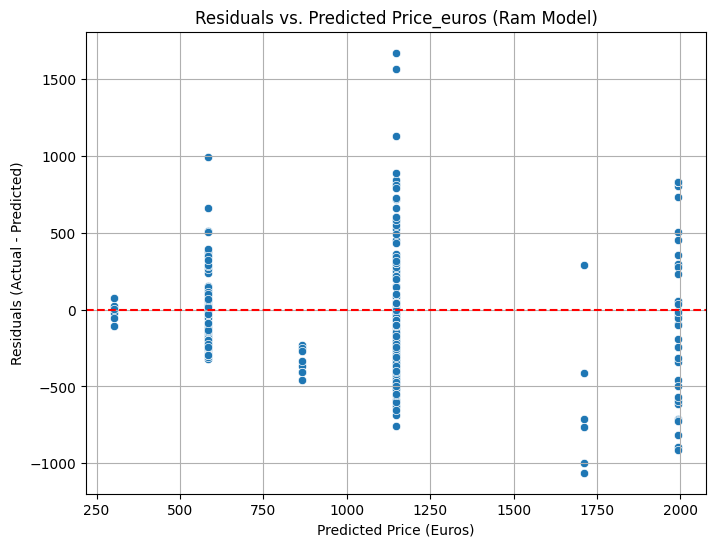

In [ ]:
residuals_ram = y_test - y_pred_ram

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_ram, y=residuals_ram)
plt.axhline(y=0, color='r', linestyle='--') # Horizontal line at 0 for reference
plt.title('Residuals vs. Predicted Price_euros (Ram Model)')
plt.xlabel('Predicted Price (Euros)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

### Model Summary

In [ ]:
display(model_ram.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_euros   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     1309.
Date:                Mon, 24 Nov 2025   Prob (F-statistic):          3.27e-186
Time:                        17:52:36   Log-Likelihood:                -7806.9
No. Observations:                1042   AIC:                         1.562e+04
Df Residuals:                    1040   BIC:                         1.563e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1116.4275     13.461     82.936      0.000    1090.013    1142.842
Ram          481.5878     13.311     36.181      0.000     455.469     507.707
==============================================================================
Omnibus:                       69.120   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.977
Skew:                           0.614   Prob(JB):                     3.53e-19
Kurtosis:                       3.672   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Coefficient

In [ ]:
model_ram_coefficients = model_ram.params
display(model_ram_coefficients)

,0
const,1116.427466
Ram,481.587826


### Model Equation

In [ ]:
print(f"Price_euros = {model_ram_coefficients['const']:.2f} + ({model_ram_coefficients['Ram']:.2f} * Ram)")

Price_euros = 1116.43 + (481.59 * Ram)


### Model Evaluation

In [ ]:
ram_sizes_to_predict = [4, 8, 16]

for ram_size in ram_sizes_to_predict:
  new_observation = {'const': 1, 'Ram': ram_size}
  new_X = pd.DataFrame([new_observation])
  predicted_price = model_ram.predict(new_X)
  print(f"Predicted price for {ram_size}GB RAM: {predicted_price[0]:.2f}")

Predicted price for 4GB RAM: 3042.78
Predicted price for 8GB RAM: 4969.13
Predicted price for 16GB RAM: 8821.83
